In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

# Задаем трансформации для изображений
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Загружаем датасет CIFAR-10
cifar10 = torchvision.datasets.CIFAR10(root='./data',  download=True, transform=transform)

# Определяем класс, который хотим извлечь (например, "cat")
class_name = "cat"
class_index = 1  # Индекс класса "cat" в CIFAR-10

# Фильтруем данные по классу
class_images = []
class_labels = []

for img, label in cifar10:
    if label == class_index:
        class_images.append(img)
        class_labels.append(label)

# Создаем новый датасет для выбранного класса
class_dataset = torch.utils.data.TensorDataset(torch.stack(class_images), torch.tensor(class_labels))

# Пример использования нового датасета
dataloader = torch.utils.data.DataLoader(class_dataset, batch_size=1, shuffle=True)

# Выводим несколько изображений из нового датасета
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5  # Обратная трансформация
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

# Получаем один батч данных
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Отображаем изображения
for i in range(len(images)):
    imshow(images[i])
    print('image:',images[i])


RuntimeError: stack expects each tensor to be equal size, but got [3, 682, 500] at entry 0 and [3, 667, 500] at entry 1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Упрощённый слой свёртки
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))

# Простая U-Net подобная структура
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            ConvBlock(3, 64),  # Изменено на 3 канала
            ConvBlock(64, 128)
        )
        self.decoder = nn.Sequential(
            ConvBlock(128, 64),
            ConvBlock(64, 3)  # Изменено на 3 канала
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

# Простой тренинг луп
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Датасет и лоадер (например CIFAR-10 для RGB изображений)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Нормализация для RGB
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

model = SimpleUNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
'''
# Обучающий цикл
def train_model(num_epochs):
    #model.train()
    for epoch in range(num_epochs):
        for batch_idx, (data, _) in enumerate(train_loader):
            print(data.shape)
            data = data.to(device)
    print(data)

            # Добавляем "шум" к изображениям
            noised_data = data + 0.1 * torch.randn_like(data)

            optimizer.zero_grad()
            output = model(noised_data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print(f'Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}], Loss: {loss.item():.4f}')
                with torch.no_grad():
                    output_img = output[0].cpu().detach().numpy().transpose(1, 2, 0)  # Изменение порядка для отображения
                    noised_img = noised_data[0].cpu().detach().numpy().transpose(1, 2, 0)
                    original_img = data[0].cpu().detach().numpy().transpose(1, 2, 0)

                    plt.figure(figsize=(9,3))
                    plt.subplot(1, 3, 1)
                    plt.title("Original")
                    plt.imshow((original_img + 1) / 2)  # Обратная нормализация для отображения

                    plt.subplot(1, 3, 2)
                    plt.title("Noised")
                    plt.imshow((noised_img + 1) / 2)  # Обратная нормализация для отображения

                    plt.subplot(1, 3, 3)
                    plt.title("Denoised")
                    plt.imshow((output_img + 1) / 2)  # Обратная нормализация для отображения

                    plt.show()

train_model(5)
'''

100%|██████████| 170M/170M [00:02<00:00, 78.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


'\n# Обучающий цикл\ndef train_model(num_epochs):\n    #model.train()\n    for epoch in range(num_epochs):\n        for batch_idx, (data, _) in enumerate(train_loader):\n            print(data.shape)\n            data = data.to(device)\n    print(data)\n\n            # Добавляем "шум" к изображениям\n            noised_data = data + 0.1 * torch.randn_like(data)\n\n            optimizer.zero_grad()\n            output = model(noised_data)\n            loss = criterion(output, data)\n            loss.backward()\n            optimizer.step()\n\n            if batch_idx % 100 == 0:\n                print(f\'Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}], Loss: {loss.item():.4f}\')\n                with torch.no_grad():\n                    output_img = output[0].cpu().detach().numpy().transpose(1, 2, 0)  # Изменение порядка для отображения\n                    noised_img = noised_data[0].cpu().detach().numpy().transpose(1, 2, 0)\n                    original_img = data[0].cpu().detach()

In [3]:
 # заранее определите класс модели
model.load_state_dict(torch.load('clip2.pth'))

<ipython-input-3-3c7c5da2ba6a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('clip2.pth'))


<All keys matched successfully>

In [81]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
import matplotlib.pyplot as plt

# Задаем трансформации для изображений
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Загружаем датасет Flowers102
dataset = Flowers102(root='./data', download=True, transform=transform)

# Определяем класс, который мы хотим извлечь
target_class = 'Oenothera speciosa'

# Получаем индекс целевого класса
#class_to_idx = 0
target_class_idx = 72

# Извлекаем данные, соответствующие целевому классу
target_images = []
target_labels = []

for img, label in dataset:
    if label == target_class_idx:
        target_images.append(img)
        target_labels.append(label)
class_dataset = torch.utils.data.TensorDataset(torch.stack(target_images), torch.tensor(target_labels))

# Пример использования нового датасета
dataloader = torch.utils.data.DataLoader(class_dataset, batch_size=1, shuffle=True)
# Функция для отображения изображений
"""def imshow(images, labels):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())
        plt.title(f'Class: {labels[i]}')
        plt.axis('off')
    plt.show()

# Отображаем извлеченные изображения
imshow(target_images[:10], target_labels[:10])"""  # Показываем первые 10 изображений


"def imshow(images, labels):\n    plt.figure(figsize=(12, 6))\n    for i in range(len(images)):\n        plt.subplot(2, 5, i + 1)\n        plt.imshow(images[i].permute(1, 2, 0).numpy())\n        plt.title(f'Class: {labels[i]}')\n        plt.axis('off')\n    plt.show()\n\n# Отображаем извлеченные изображения\nimshow(target_images[:10], target_labels[:10])"

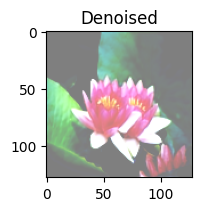

In [85]:
for data in dataloader:
    z = data[0]
    z = z.to(device)
noised_data = z + 0.1 * torch.randn_like(z)
output = model(z)
"""original_img = z[0].cpu().detach().numpy().transpose(1, 2, 0)
plt.figure(figsize=(9,3))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow((original_img + 1) / 2)  # Обратная нормализация для отображения"""
output_img = output[0].cpu().detach().numpy().transpose(1, 2, 0)
plt.subplot(1, 3, 3)
plt.title("Denoised")
plt.imshow((output_img + 1) / 2)  # Обратная нормализация для отображения

plt.show()

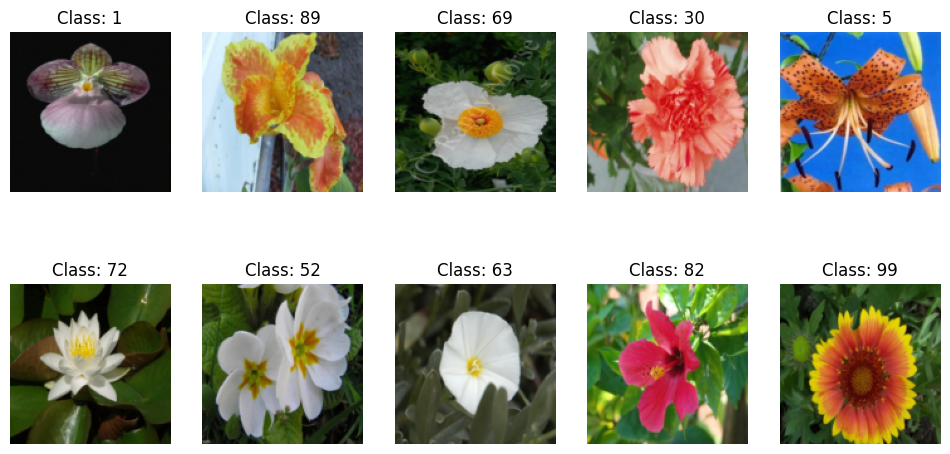

In [67]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
import matplotlib.pyplot as plt
import numpy as np

# Задаем трансформации для изображений
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Загружаем датасет Flowers102
dataset = Flowers102(root='./data', download=True, transform=transform)

# Функция для отображения изображений и их классов
def imshow(images, labels):
    # Переключаемся на режим отображения
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())
        plt.title(f'Class: {labels[i]}')
        plt.axis('off')
    plt.show()

# Получаем несколько изображений и их классов
def get_sample_images(dataset, num_samples=10):
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    images = []
    labels = []

    for idx in indices:
        img, label = dataset[idx]
        images.append(img)
        labels.append(label)
       # print(labels)

    return images, labels

# Получаем и отображаем выборку изображений
sample_images, sample_labels = get_sample_images(dataset)
imshow(sample_images, sample_labels)
